<a href="https://colab.research.google.com/github/antoniosergiok/AluraStoreOracleOne/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importação dos dados**



In [87]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38




# **---**



In [88]:
# Verificar valores nulos
loja.info()
loja2.info()
loja3.info()
loja4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns 

In [89]:
# Remover valores nulos
loja.dropna(inplace=True)
loja2.dropna(inplace=True)
loja3.dropna(inplace=True)
loja4.dropna(inplace=True)

#1. Análise do faturamento

In [90]:
# Calculando o faturamento de cada loja
faturamento_loja = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Exibindo os resultados
print(f"Faturamento Loja: R$ {faturamento_loja:,.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:,.2f}")

Faturamento Loja: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


## **Gráfico**

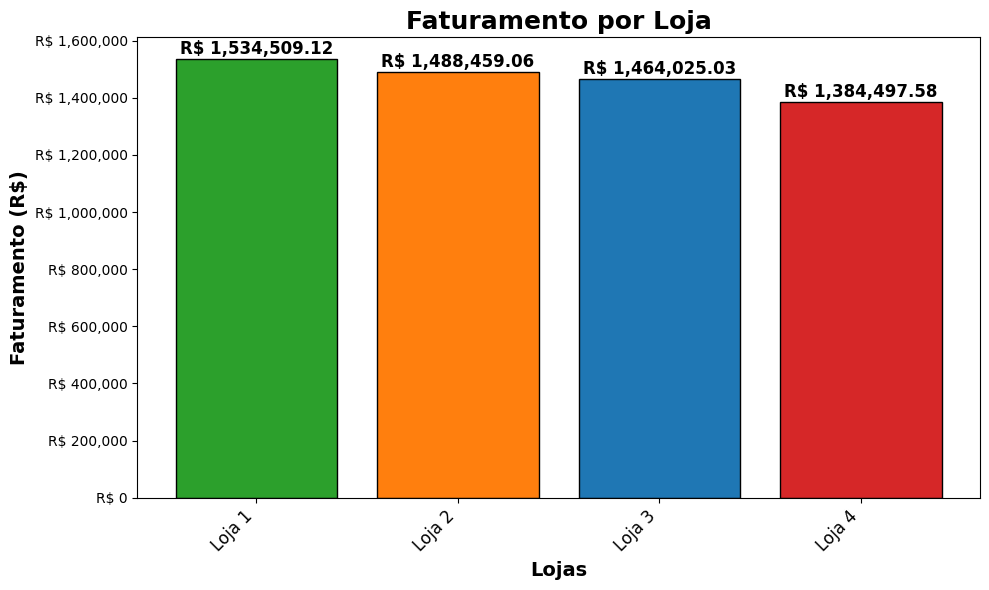

In [91]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Dados de faturamento por loja
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Criando DataFrame de faturamento
df_faturamento = pd.DataFrame({'Loja': lojas, 'Faturamento': faturamento})

# Validando se os dados são consistentes
if df_faturamento.isnull().values.any():
    raise ValueError("Os dados de faturamento contêm valores nulos. Verifique suas variáveis.")

# Configurações do gráfico
plt.figure(figsize=(10, 6))  # Tamanho do gráfico ajustado para melhor visualização
bars = plt.bar(
    df_faturamento['Loja'],
    df_faturamento['Faturamento'],
    color=['#2ca02c', '#ff7f0e', '#1f77b4', '#d62728'],  # Cores para as barras
    edgecolor='black'  # Adiciona bordas às barras para melhor contraste
)

# Adicionando título e rótulos
plt.title('Faturamento por Loja', fontsize=18, fontweight='bold')  # Título
plt.xlabel('Lojas', fontsize=14, fontweight='bold')  # Rótulo do eixo X
plt.ylabel('Faturamento (R$)', fontsize=14, fontweight='bold')  # Rótulo do eixo Y

# Formatação do eixo Y para exibir valores monetários
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('R$ {x:,.0f}'))

# Exibindo os valores em cima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 5000,
        f'R$ {yval:,.2f}',
        ha='center', va='bottom', fontsize=12, fontweight='bold'  # Ajusta fonte e tamanho
    )

# Ajustando rótulos do eixo X
plt.xticks(rotation=45, ha='right', fontsize=12)

# Ajustando o layout para evitar sobreposição de elementos
plt.tight_layout()

# Exibindo o gráfico
plt.show()




# **---**



# 2. Vendas por Categoria


In [92]:
lojas = [loja, loja2, loja3, loja4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Agrupando e contando registros por categoria com groupby() e .size()
tabelas = [
    l.groupby('Categoria do Produto').size().rename(n)
    for l, n in zip(lojas, nomes)
]

# Une as tabelas, preenche com zeros e converte para inteiros
tabela_vendas_por_categoria = pd.concat(tabelas, axis=1).fillna(0).astype(int)

# Exibe a tabela com quantidade de produtos vendidos por categoria
tabela_vendas_por_categoria

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
eletronicos,448,422,451,451
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
moveis,465,442,499,480
utilidades domesticas,171,181,177,201


## **Gráfico**

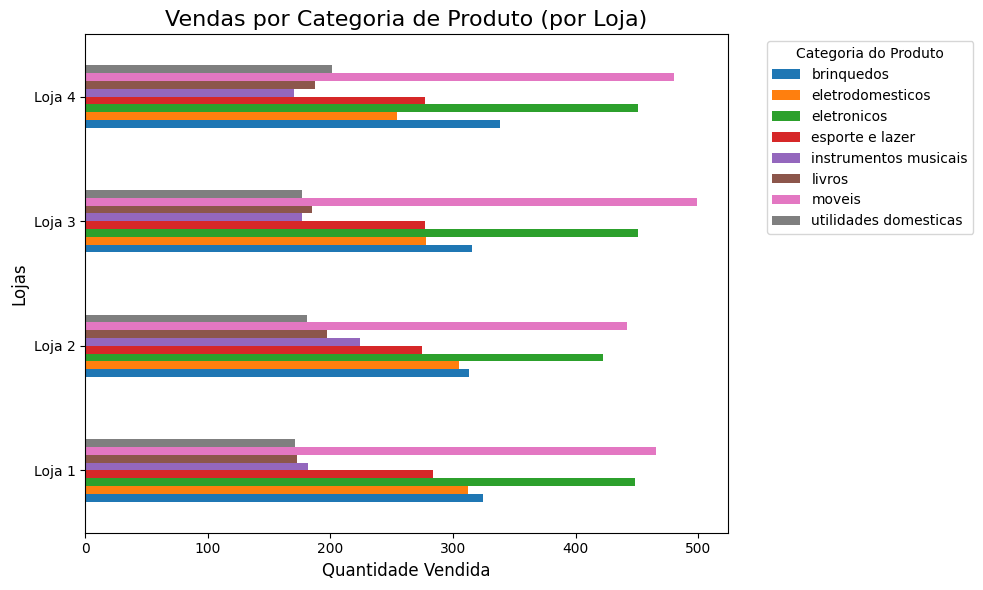

In [93]:
# Transpondo a tabela para inverter linhas e colunas
tabela_vendas_por_categoria_transposta = tabela_vendas_por_categoria.T

# Criando o gráfico de barras horizontais
tabela_vendas_por_categoria_transposta.plot(kind='barh', figsize=(10, 6))

# Adicionando título e rótulos
plt.title('Vendas por Categoria de Produto (por Loja)', fontsize=16)
plt.xlabel('Quantidade Vendida', fontsize=12)
plt.ylabel('Lojas', fontsize=12)

# Ajusta a legenda
plt.legend(title='Categoria do Produto', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

# **Quatro categorias com mais vendas**

In [94]:
# Calculando a soma das vendas por categoria em todas as lojas
vendas_por_categoria = tabela_vendas_por_categoria.sum(axis=1)

# Ordenando as categorias pela quantidade de vendas em ordem decrescente
categorias_mais_vendidas = vendas_por_categoria.sort_values(ascending=False)

# Seleciona as quatro categorias com mais vendas
quatro_categorias_mais_vendidas = categorias_mais_vendidas.head(4)

# Convertendo para DataFrame e renomeando a coluna
quatro_categorias_mais_vendidas = quatro_categorias_mais_vendidas.to_frame().rename(columns={0: 'Total de Vendas'})

# Exibindo as quatro categorias que mais aparecem
quatro_categorias_mais_vendidas

,Total de Vendas
Categoria do Produto,
moveis,1886
eletronicos,1772
brinquedos,1290
eletrodomesticos,1149


# **Quatro categorias com menos vendas**

In [95]:
# Calculando a soma das vendas por categoria em todas as lojas
vendas_por_categoria = tabela_vendas_por_categoria.sum(axis=1)

# Ordenando as categorias pela quantidade de vendas em ordem crescente
categorias_menos_vendidas = vendas_por_categoria.sort_values(ascending=True)

# Selecionando as quatro categorias com menos vendas
quatro_categorias_menos_vendidas = categorias_menos_vendidas.head(4)

# Convertendo para DataFrame e renomeando a coluna
quatro_categorias_menos_vendidas = quatro_categorias_menos_vendidas.to_frame().rename(columns={0: 'Total de Vendas'})

# Exibindo as quatro categorias que menos aparecem
quatro_categorias_menos_vendidas

,Total de Vendas
Categoria do Produto,
utilidades domesticas,730
livros,742
instrumentos musicais,753
esporte e lazer,1113




# **---**



# 3. Média de Avaliação das Lojas

In [96]:
type(loja), type(loja2), type(loja3), type(loja4)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [97]:
# Calcula a média de avaliação da compra
medias_avaliacoes = {nome: l['Avaliação da compra'].mean() for l, nome in zip(lojas, nomes)}
# Converte o dicionário para DataFrame para visualização
tabela_medias = pd.DataFrame.from_dict(medias_avaliacoes, orient='index', columns=['Média de Avaliações'])
# Formata a coluna 'Média de Avaliações' para duas casas decimais
tabela_medias['Média de Avaliações'] = tabela_medias['Média de Avaliações'].map('{:.2f}'.format)
# Exibe a tabela com médias de avaliações
tabela_medias

,Média de Avaliações
Loja 1,3.98
Loja 2,4.04
Loja 3,4.05
Loja 4,4.00


## **Gráfico**

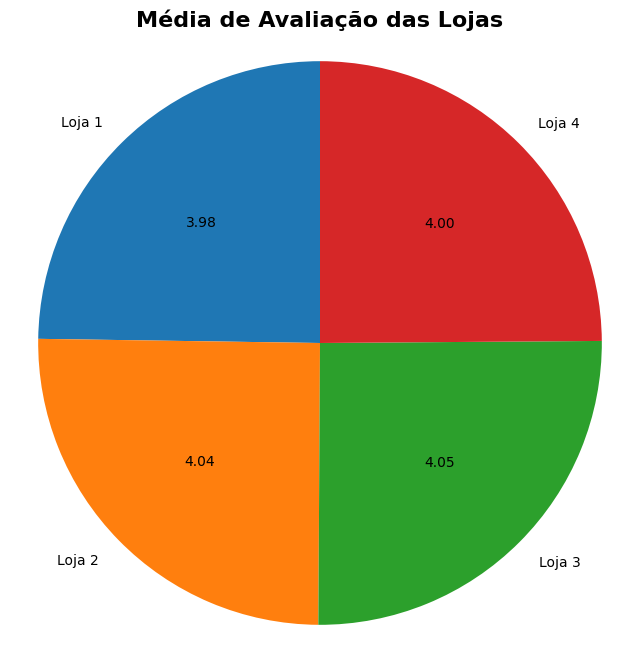

In [98]:
medias_avaliacoes = {nome: l['Avaliação da compra'].mean() for l, nome in zip(lojas, nomes)}

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(medias_avaliacoes.values(), labels=medias_avaliacoes.keys(), autopct=lambda p: '{:.2f}'.format(p * sum(medias_avaliacoes.values()) / 100), startangle=90)
plt.title('Média de Avaliação das Lojas', fontsize=16, fontweight='bold')
plt.axis('equal')  # Para garantir que o círculo seja um círculo perfeito

plt.show()



# **---**



# 4. Produtos Mais e Menos Vendidos

In [99]:
# Concatenando os DataFrames de todas as lojas
lojas = pd.concat([loja, loja2, loja3, loja4])

# Agrupando por produto e contando as ocorrências
produtos_vendidos = lojas.groupby('Produto')['Produto'].count().sort_values(ascending=False)

# Exibindo os produtos mais vendidos
print("Produtos mais vendidos:")
print(produtos_vendidos.head(10)) # Exibindo os 10 mais vendidos

# Exibindo os produtos menos vendidos
print("\nProdutos menos vendidos:")
print(produtos_vendidos.tail(10)) # Exibindo os 10 menos vendidos


Produtos mais vendidos:
Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Jogo de panelas             200
Modelagem preditiva         200
Secadora de roupas          200
Blocos de montar            199
Cama box                    199
Name: Produto, dtype: int64

Produtos menos vendidos:
Produto
Smartwatch                     172
Panela de pressão              172
Jogo de copos                  169
Poltrona                       168
Assistente virtual             167
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: Produto, dtype: int64


## **Gráfico**

## Gráfico de linhas para produtos mais vendidos

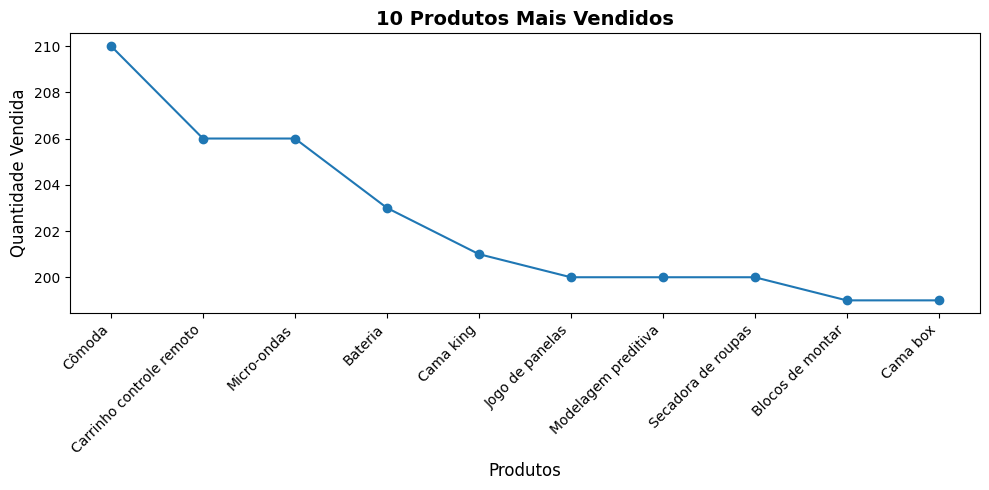

In [100]:
# Criando o gráfico de linhas para produtos mais vendidos
plt.figure(figsize=(10, 5))
plt.plot(produtos_vendidos.head(10).index, produtos_vendidos.head(10).values, marker='o', linestyle='-')
plt.xlabel('Produtos', fontsize=12)
plt.ylabel('Quantidade Vendida', fontsize=12)
plt.title('10 Produtos Mais Vendidos', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()
plt.show()

## Gráfico de linhas para produtos menos vendidos

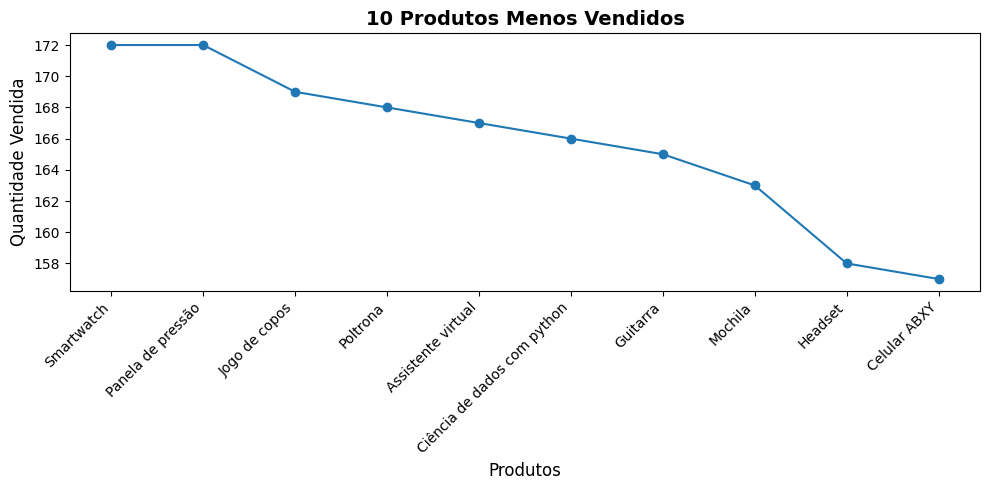

In [101]:
# Criando o gráfico de linhas para produtos menos vendidos
plt.figure(figsize=(10, 5))
plt.plot(produtos_vendidos.tail(10).index, produtos_vendidos.tail(10).values, marker='o', linestyle='-')
plt.xlabel('Produtos', fontsize=12)
plt.ylabel('Quantidade Vendida', fontsize=12)
plt.title('10 Produtos Menos Vendidos', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()
plt.show()



# **---**



# 5. Frete Médio por Loja


In [102]:
import pandas as pd
# Calcula o custo médio de frete para cada loja
custo_medio_frete_loja1 = loja['Frete'].mean()
custo_medio_frete_loja2 = loja2['Frete'].mean()
custo_medio_frete_loja3 = loja3['Frete'].mean()
custo_medio_frete_loja4 = loja4['Frete'].mean()

# Imprime os resultados
print(f"Custo Médio de Frete Loja 1: R$ {custo_medio_frete_loja1:,.2f}")
print(f"Custo Médio de Frete Loja 2: R$ {custo_medio_frete_loja2:,.2f}")
print(f"Custo Médio de Frete Loja 3: R$ {custo_medio_frete_loja3:,.2f}")
print(f"Custo Médio de Frete Loja 4: R$ {custo_medio_frete_loja4:,.2f}")

Custo Médio de Frete Loja 1: R$ 34.69
Custo Médio de Frete Loja 2: R$ 33.62
Custo Médio de Frete Loja 3: R$ 33.07
Custo Médio de Frete Loja 4: R$ 31.28


In [103]:
frete_data = {
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Médio': [custo_medio_frete_loja1, custo_medio_frete_loja2, custo_medio_frete_loja3, custo_medio_frete_loja4]
}
df_frete = pd.DataFrame(frete_data)
df_frete

,Loja,Frete Médio
0,Loja 1,34.691805
1,Loja 2,33.621941
2,Loja 3,33.074464
3,Loja 4,31.278997


# **Gráfico**

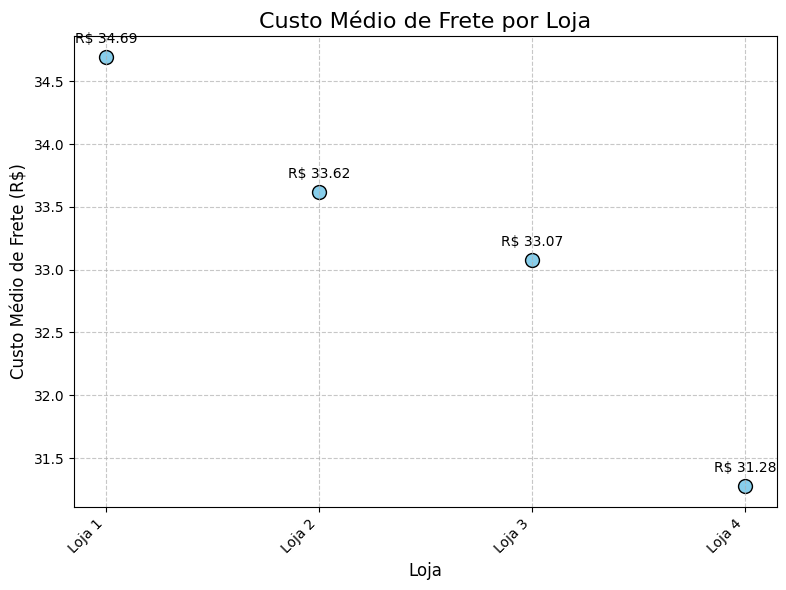

In [104]:
# Criando o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(df_frete['Loja'], df_frete['Frete Médio'], s=100, c='skyblue', edgecolors='black')  # s define o tamanho dos marcadores
plt.title('Custo Médio de Frete por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Custo Médio de Frete (R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7) # Adiciona grade ao gráfico
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo x para melhor legibilidade

# Adicionando os valores de frete médio acima de cada ponto
for i, txt in enumerate(df_frete['Frete Médio']):
    plt.annotate(f'R$ {txt:.2f}', (df_frete['Loja'][i], txt), textcoords="offset points", xytext=(0,10), ha='center')


plt.tight_layout()
plt.show()



# **---**



# Qual gasto total de cada loja com frete?

In [105]:
# prompt: Qual gasto total em reais de cada loja com frete? coloque o codigo em portugues

# Calculando o gasto total com frete para cada loja
gasto_total_frete_loja1 = loja['Frete'].sum()
gasto_total_frete_loja2 = loja2['Frete'].sum()
gasto_total_frete_loja3 = loja3['Frete'].sum()
gasto_total_frete_loja4 = loja4['Frete'].sum()

# Imprimindo os resultados
print(f"Gasto total com frete da Loja 1: R$ {gasto_total_frete_loja1:,.2f}")
print(f"Gasto total com frete da Loja 2: R$ {gasto_total_frete_loja2:,.2f}")
print(f"Gasto total com frete da Loja 3: R$ {gasto_total_frete_loja3:,.2f}")
print(f"Gasto total com frete da Loja 4: R$ {gasto_total_frete_loja4:,.2f}")

Gasto total com frete da Loja 1: R$ 81,837.97
Gasto total com frete da Loja 2: R$ 79,314.16
Gasto total com frete da Loja 3: R$ 78,022.66
Gasto total com frete da Loja 4: R$ 73,755.88


# Qual faturamento total de cada loja?

In [106]:
print(f"Faturamento Loja 1: R$ {faturamento_loja:,.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:,.2f}")

Faturamento Loja 1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


# Subtração do faturamento de cada loja com o gasto total com frete de cada loja

In [107]:
# Calculando a diferença entre faturamento e gasto com frete para cada loja
diferenca_loja1 = faturamento_loja - gasto_total_frete_loja1
diferenca_loja2 = faturamento_loja2 - gasto_total_frete_loja2
diferenca_loja3 = faturamento_loja3 - gasto_total_frete_loja3
diferenca_loja4 = faturamento_loja4 - gasto_total_frete_loja4

# Imprimindo os resultados
print(f"Diferença entre faturamento e frete da Loja 1: R$ {diferenca_loja1:,.2f}")
print(f"Diferença entre faturamento e frete da Loja 2: R$ {diferenca_loja2:,.2f}")
print(f"Diferença entre faturamento e frete da Loja 3: R$ {diferenca_loja3:,.2f}")
print(f"Diferença entre faturamento e frete da Loja 4: R$ {diferenca_loja4:,.2f}")

Diferença entre faturamento e frete da Loja 1: R$ 1,452,671.15
Diferença entre faturamento e frete da Loja 2: R$ 1,409,144.90
Diferença entre faturamento e frete da Loja 3: R$ 1,386,002.37
Diferença entre faturamento e frete da Loja 4: R$ 1,310,741.70


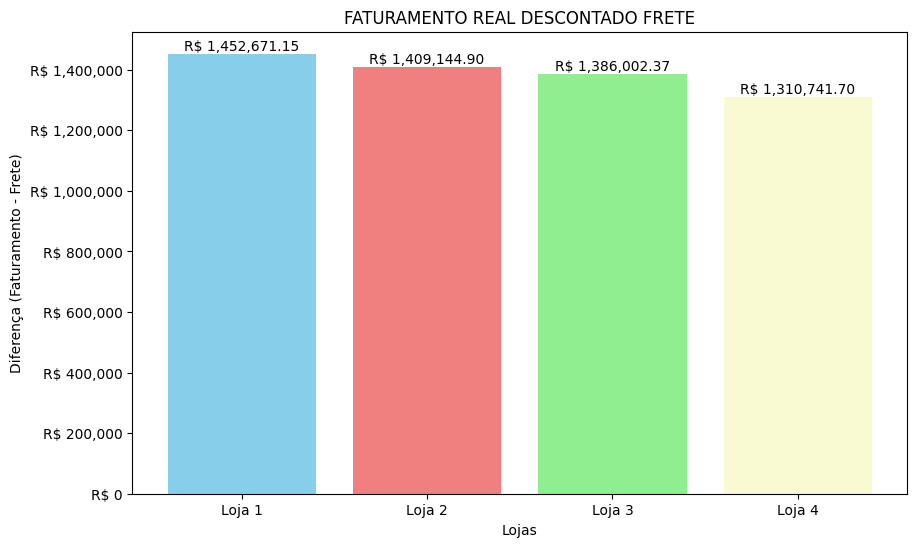

In [108]:
# Dados de diferença entre faturamento e frete
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
diferencas = [diferenca_loja1, diferenca_loja2, diferenca_loja3, diferenca_loja4]

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(lojas, diferencas, color=['skyblue', 'lightcoral', 'lightgreen', 'lightgoldenrodyellow'])
plt.xlabel("Lojas")
plt.ylabel("Diferença (Faturamento - Frete)")
plt.title("FATURAMENTO REAL DESCONTADO FRETE")

# Formatando o eixo y para mostrar valores decimais
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('R$ {x:,.0f}'))

# Adicionando valores no topo das barras com formatação de moeda
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, f'R$ {yval:,.2f}', ha='center', va='bottom')

plt.show()



# **---**



# **Analise**

Após analisar os dados fornecidos, incluindo faturamento, vendas por categoria, média de avaliação das lojas, produtos mais e menos vendidos, frete médio e gasto total com frete, podemos concluir que a **Loja 4** seria a candidata mais propícia para fechamento.

Razões para o fechamento da Loja 4:

**Menor Faturamento**: A Loja 4 apresenta o menor faturamento entre todas as lojas, indicando um desempenho comercial inferior.

**Baixa Participação nas Vendas por Categoria**: A Loja 4 possui menor participação nas vendas da maioria das categorias de produtos, demonstrando menor atratividade para os clientes.

**Média de Avaliação Intermediária**: Embora não seja a pior, a média de avaliação da Loja 4 não se destaca positivamente, sugerindo que a experiência do cliente pode não ser satisfatória.

**Menor Quantidade de Produtos Mais Vendidos**: A Loja 4 tem menos produtos entre os mais vendidos, indicando menor procura por seus produtos em comparação com as outras lojas.

**Custo de Frete Médio**: Apesar de não ser o mais alto, o custo de frete médio da Loja 4 ainda é um fator a ser considerado em relação ao seu desempenho.

**Gasto Total com Frete**: A Loja 4 apresenta um gasto total com frete considerável, o que impacta negativamente seu faturamento real.

**Faturamento Real Descontado Frete**: A Loja 4 é a que tem o menor faturamento real após descontar o frete, mostrando que a margem de lucro é menor.